In [23]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)  #adjusts the configuration of the plots to be created

In [24]:
#READ CSV

Movies = pd.read_csv('movies.csv')
Movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# DATA CLEANING

In [25]:
# Check for MISSING DATA

Movies.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [26]:
#DROP MISSING VALUES AS OLD MOVIES HAVE NO BUDGETS AND SOME OTHER FIELDS

Movies = Movies.dropna()

In [27]:
print(Movies.shape)

(5421, 15)


In [28]:
# CHANGE DATA TYPES to remove the decimal numbers from the columns with amounts

Movies['budget'] = Movies['budget'].astype('int64')
Movies['gross'] = Movies['gross'].astype('int64')
Movies['votes'] = Movies['votes'].astype('int64')
Movies.dtypes.head()

name        object
rating      object
genre       object
year         int64
released    object
dtype: object

In [29]:
#CREATE ANOTHER COLUMN TO MAKE THE RELEASED YEAR ANDYEAR COLUMN TO TALLY(the original data tends to have different values for the years. The released year and the year for some fields do not match)

Movies['correct_year'] = Movies['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [30]:
#DISPLAY ALL ROWS IN THE DATASET
pd.set_option('display.max_rows', None)

In [31]:
#ORDER DATASET BY THE GROSS REVENUE IN DESCENDING ORDER

Movies.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [32]:
#check for duplicates
duplicates = Movies[Movies.duplicated()]
duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year


# EDA (Exploratory Data Analysis)

In [36]:
#Genre Distribution to identify the most common and rare genres.

# Get the genre distribution
genre_distribution = Movies["genre"].value_counts()

# Print the most common and rare genres
most_common_genres = genre_distribution.sort_values(ascending=False)[:5]
rare_genres = genre_distribution.sort_values(ascending=True)[:5]
print("The most common genres are:")
print(most_common_genres)
print(   )
print("The rarest genres are:")
print(rare_genres)

The most common genres are:
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Name: genre, dtype: int64

The rarest genres are:
Western     2
Family      4
Romance     5
Sci-Fi      6
Thriller    7
Name: genre, dtype: int64


In [39]:
#Top Directors and Writers to Explore the directors and writers with the highest number of movie credits, to help identify influential filmmakers in the dataset

# Get the director and writer counts
director_count = Movies["director"].value_counts()
writer_count = Movies["writer"].value_counts()

# Print the top directors and writers
top_directors = director_count.sort_values(ascending=False)[:5]
top_writers = writer_count.sort_values(ascending=False)[:5]
print("The top directors are:" )
print(top_directors)
print(   )
print("The top writers are:" )
print(top_writers)


The top directors are:
Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Steven Soderbergh    23
Ridley Scott         23
Name: director, dtype: int64

The top writers are:
Woody Allen     32
Stephen King    29
John Hughes     20
Luc Besson      14
Joel Coen       13
Name: writer, dtype: int64


In [40]:


# Get the production country distribution
production_country_distribution = Movies["country"].value_counts()

# Print the top 5 production countries
top_production_countries = production_country_distribution.sort_values(ascending=False)[:5]
print("The top 5 production countries are:" )
print(top_production_countries)


The top 5 production countries are:
United States     4319
United Kingdom     492
Canada             111
France             105
Germany             82
Name: country, dtype: int64


# CORRELATIONS

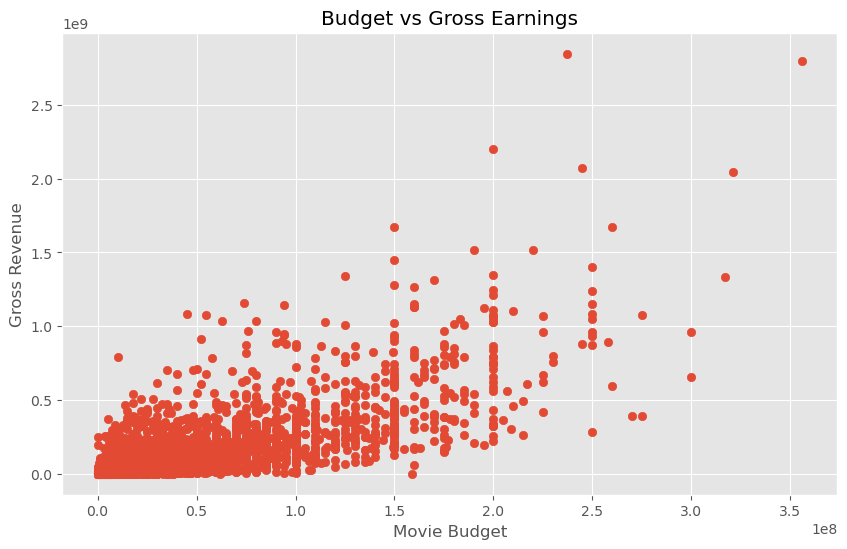

In [12]:
#SCATTER PLOT TO COMPARE THE GROSS AND BUDGET

plt.scatter(x=Movies['budget'], y=Movies['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

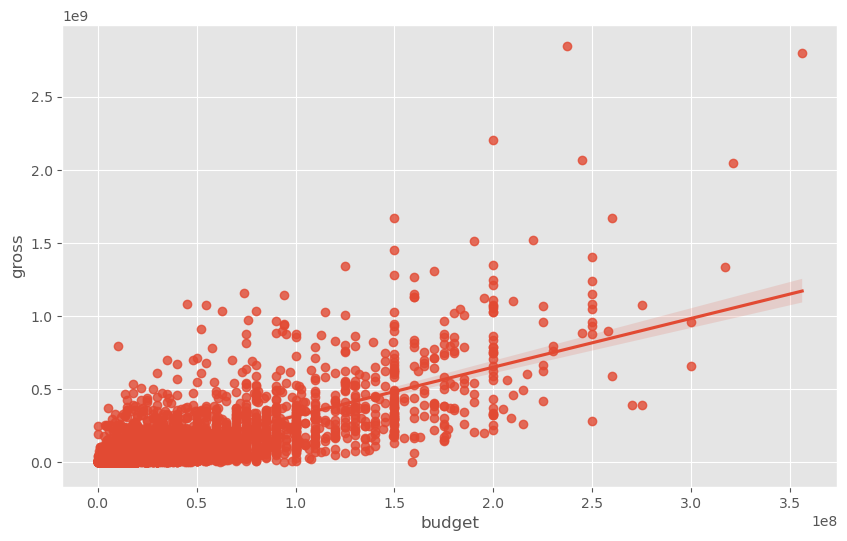

In [13]:
#The above does not give a visible and understandable plot so let us try another plot

sns.regplot(x='budget', y='gross', data=Movies)

In [ ]:
#with these plots, there is some form of correlation but how much?
#Time to figure that out


In [15]:
Movies.corr()

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


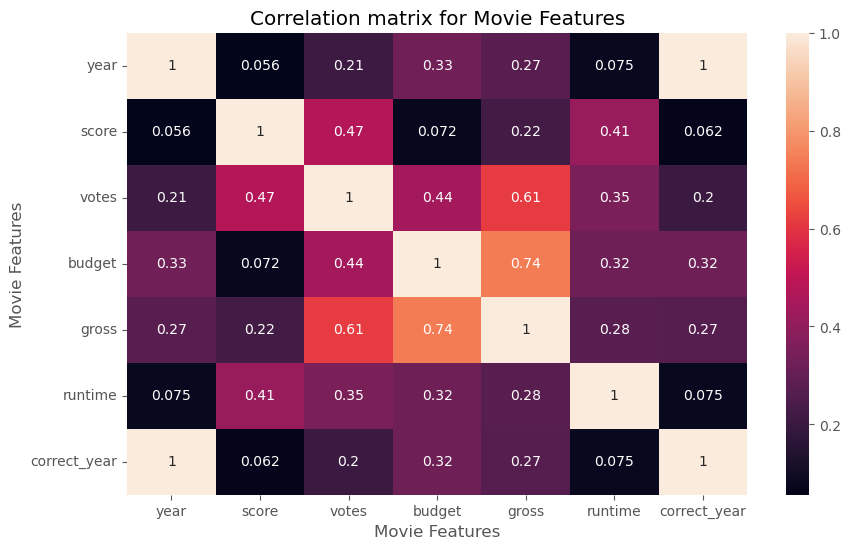

In [16]:
#plot the correlation in a graph

correlation_matrix = (Movies.corr())

sns.heatmap(correlation_matrix, annot = True) #annotation puts the values of the correlation in place
plt.title('Correlation matrix for Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [17]:
#Categorize the non numeric values so they can be corelated with other numeric features

Movies_num = Movies

for s in Movies_num.columns:
    if(Movies_num[s].dtype == 'object'):
        Movies_num[s] = Movies_num[s].astype('category')
        Movies_num[s] = Movies_num[s].cat.codes
        
Movies_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980


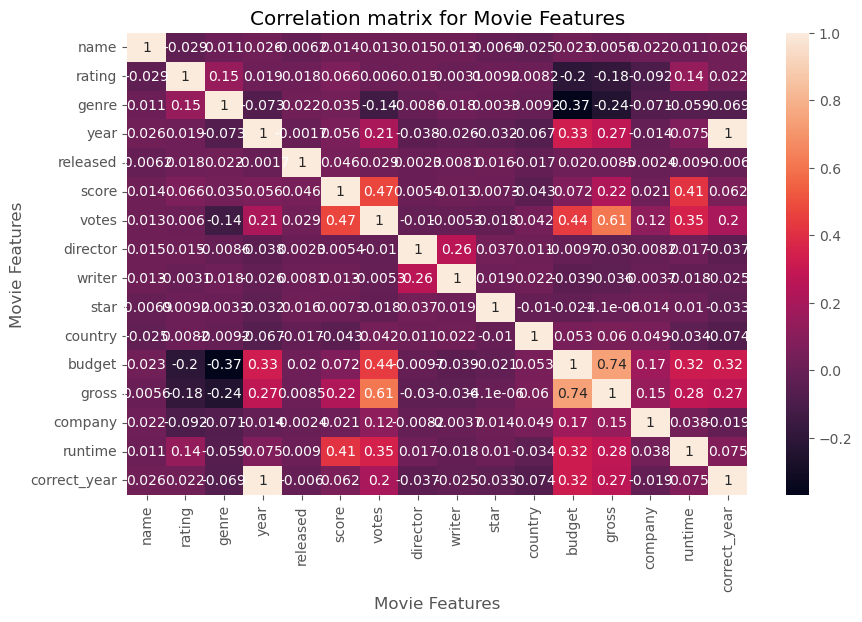

In [18]:
#plot the correlation in a graph

correlation_matrix = (Movies_num.corr())

sns.heatmap(correlation_matrix, annot = True) #annotation puts the values of the correlation in place
plt.title('Correlation matrix for Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
#CORRELATION MATRIX IN NUMBERS
Movies_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


In [20]:
# ORGANIZE THE MATRIX TO SEE THE FEATURES WITH HIGH CORRELATION EASILY

Movies_mat = Movies_num.corr()
corr_pairs = Movies_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              correct_year    0.025542
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [21]:
#FEATURES WITH HIGHEST CORRELATION (FROM 0.5)

sorted_movies = corr_pairs.sort_values()
high_corr = sorted_movies[(sorted_movies > 0.5) &  (sorted_movies < 1)]

high_corr

gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
year          correct_year    0.998726
correct_year  year            0.998726
dtype: float64

In [22]:




# Get the genre distribution
genre_distribution = Movies["genre"].value_counts()

# Print the most common and rare genres
most_common_genres = genre_distribution.sort_values(ascending=False)[:5]
rare_genres = genre_distribution.sort_values(ascending=True)[:5]
print("The most common genres are:", most_common_genres)
print("The rarest genres are:", rare_genres)


The most common genres are: 4    1496
0    1415
6     863
5     399
1     327
Name: genre, dtype: int64
The rarest genres are: 14    2
7     4
11    5
12    6
13    7
Name: genre, dtype: int64
